# Advance Data Augmentation With Keras

## Setup The Environment

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Load CIFAR-10 dataset for training images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


c:\Project\Software\Deep-Learning-with-Keras-and-Tensorflow\.venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


In [5]:
# Normalize the pixel values for augmentation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

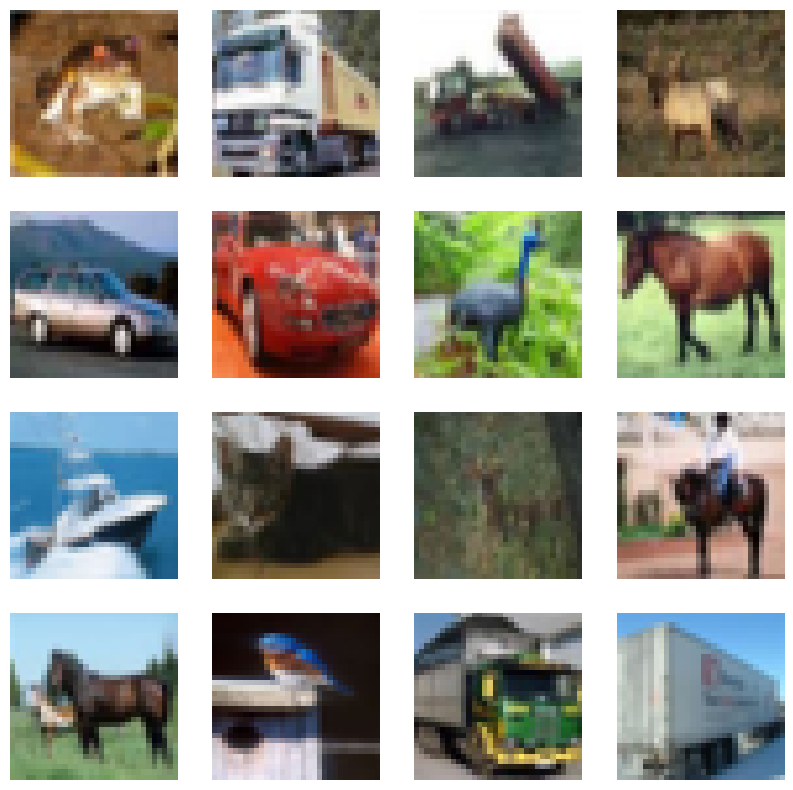

In [6]:
# Display a sample of the training images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()


## Create Sample.jpg 

In [7]:
from PIL import Image, ImageDraw

# Create a blank white image
image = Image.new('RGB', (224, 224), color = (255, 255, 255))

# Draw a red square
draw = ImageDraw.Draw(image)
draw.rectangle([(50, 50), (174, 174)], fill=(255, 0, 0))

# Save the image
image.save('sample.jpg')


In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array 

# Load a sample image 
img_path = 'sample.jpg' 
img = load_img(img_path) 
x = img_to_array(img) 
x = np.expand_dims(x, axis=0) 

# Basic Data Augmentation

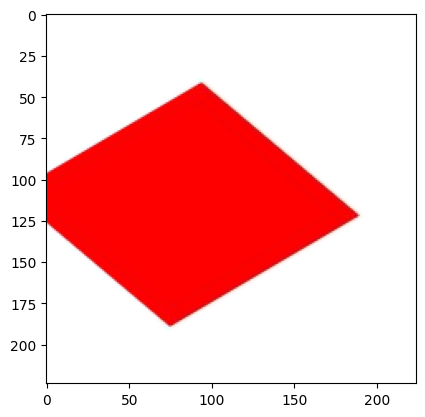

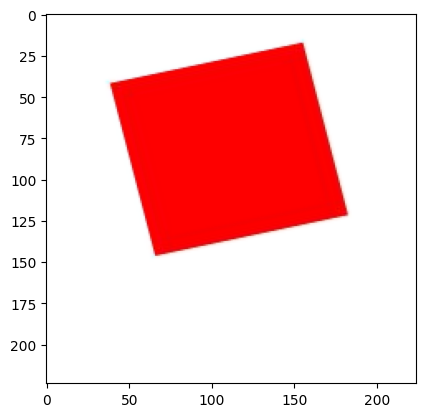

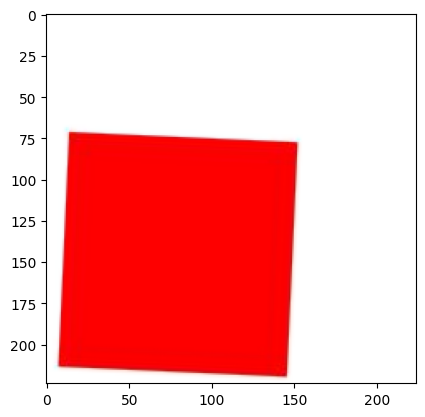

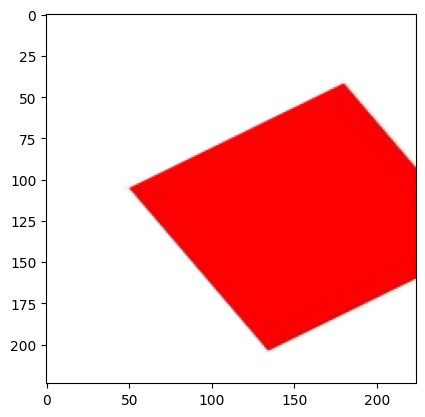

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load the sample image
img_path = 'sample.jpg'
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Create an instance of ImageDataGenerator with basic augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate batches of augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()


# Feature Wise and Sample Wise Normalization

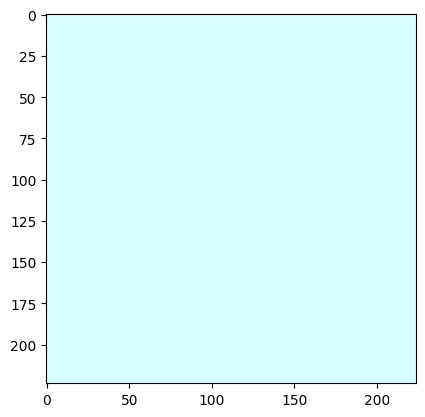

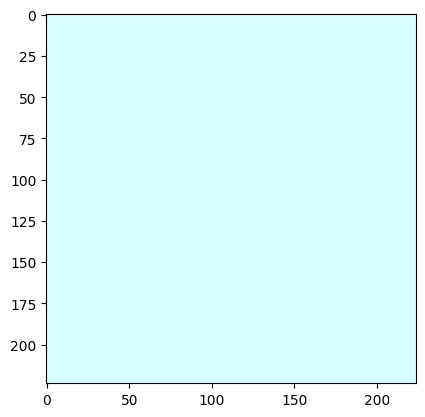

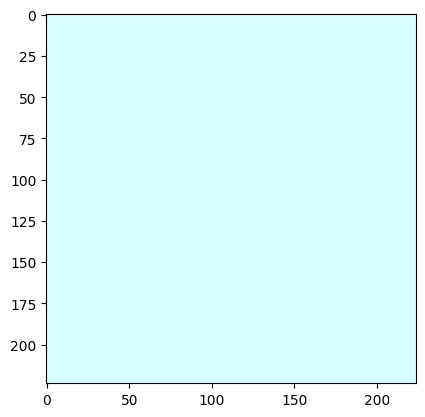

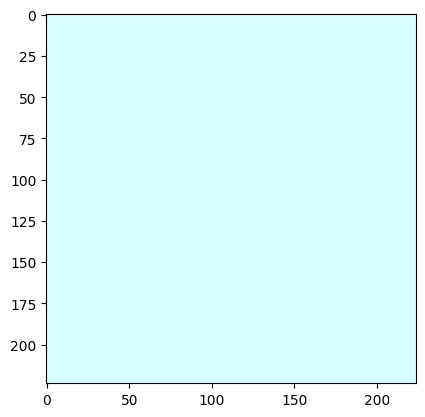

In [11]:
# Create an instance of ImageDataGenerator with normalization options
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Load the sample image again and fit the generator (normally done on the training set)
datagen.fit(x)

# Generate batches of normalized images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()


# Custom Data Augmentation Function

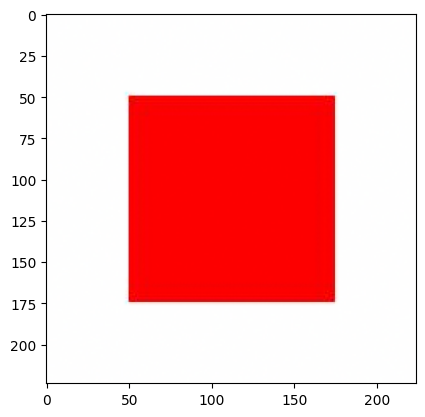

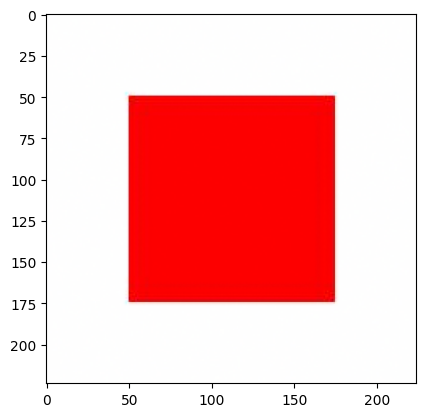

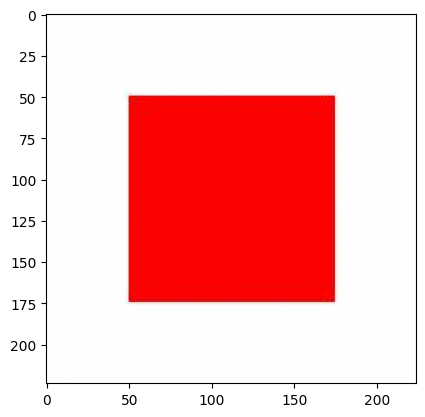

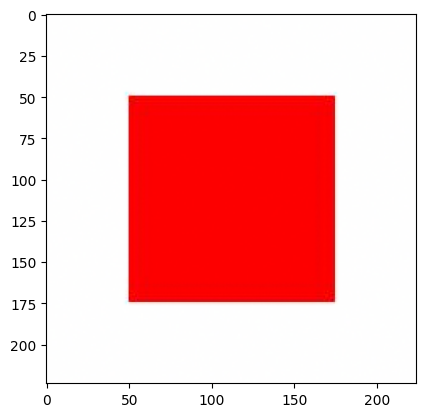

In [12]:
def add_random_noise(image):
    noise = np.random.normal(0, 0.1, image.shape)
    return image + noise

# Create an instance of ImageDataGenerator with custom augmentation
datagen = ImageDataGenerator(
    preprocessing_function=add_random_noise
)

# Generate batches of augmented images with noise
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# Visualize Augmented Images

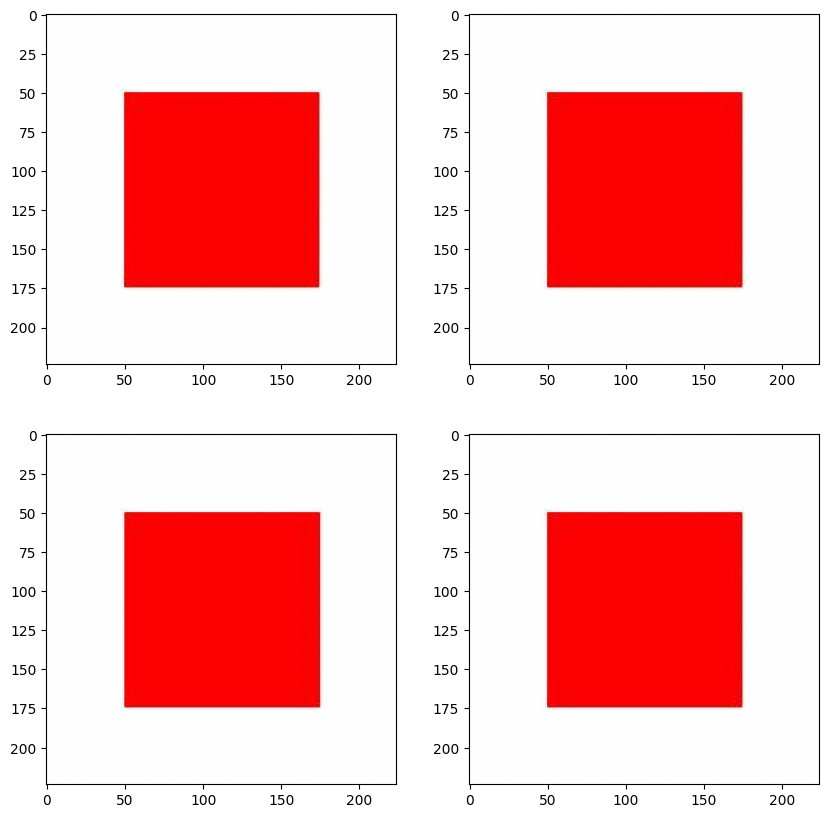

In [13]:
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i >= 4:  # show only 4 versions
        break
    plt.subplot(2, 2, i+1)
    plt.imshow(batch[0].astype('uint8'))
plt.show()